##**Proyecto de Deep Learning**
# Reconocimiento de imágenes de frutas y verduras
Manuela Gutiérrez Cano

In [ ]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
%matplotlib inline


<a href="https://colab.research.google.com/drive/1vW4HJ6rLIf-c5J4PaGO6J9JF6AoW-NTu#scrollTo=P4kTo5jjjd_j" target="_parent\"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**1. Exploración y preprocesamiento de los datos** 
En la primera etapa del proceso de clasificación es necesario preprocesar las imágenes con el fin de que estas estén aptas para ser ingresadas a los modelos de Deep Learning para que con esto se puedan realizar predicciones correctas en tiempos futuros.

Los datos se encuentran en la página de Kaggle https://www.kaggle.com/datasets/kritikseth/fruit-and-vegetable-image-recognition?resource=download.

In [ ]:
! pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**NOTA:** Antes de ejecutar la siguiente celda es necesario tener el archivo .json que contiene las credenciales de usuario de Kaggle, esto con el fin de poder descargar los datos desde Kaggle. Para obtener este archivo seguir los siguientes pasos:

1. Ir a la página de Kaggle, autenticarse e ir al perfil.
2.Seleccionar la pestaña Account.
3. Dar click en el botón Create New API Token y abrir el archivo, allí aparecerán los datos username y key.

In [ ]:
# Ejecutar una sola vez
import opendatasets as od
dataset = "https://www.kaggle.com/datasets/kritikseth/fruit-and-vegetable-image-recognition?resource=download"
od.download(dataset)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: manuelagutirrezcano
Your Kaggle Key: ··········


100%|██████████| 1.98G/1.98G [00:25<00:00, 85.1MB/s]


In [ ]:
import tensorflow as tf
from tensorflow.keras import models,layers
import pandas as pd 
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

A continuacion se crea el dataset de train y de test.

In [ ]:
train = tf.keras.utils.image_dataset_from_directory(
    
    '/content/fruit-and-vegetable-image-recognition/train',
    labels = 'inferred',
    label_mode = 'categorical',
    batch_size = 32,
    image_size = (64,64)
   
)

Found 3115 files belonging to 36 classes.


In [ ]:
test = tf.keras.utils.image_dataset_from_directory(
    
    '/content/fruit-and-vegetable-image-recognition/test',
    labels = 'inferred',
    label_mode = 'categorical',
    batch_size = 32,
    image_size = (64,64)
    
)

Found 359 files belonging to 36 classes.


In [ ]:
validation = tf.keras.utils.image_dataset_from_directory(
    
    '/content/fruit-and-vegetable-image-recognition/validation',
    labels = 'inferred',
    label_mode = 'categorical',
    batch_size = 32,
    image_size = (64,64)

)

Found 351 files belonging to 36 classes.


In [ ]:
import os
import random
import cv2

Se especifican los nombres de las clases de frutas y verduras que hay en el conjunto de datos.

In [ ]:
datos = '/content/fruit-and-vegetable-image-recognition/train'
clases = os.listdir(datos)
print(clases)                                          # las clases
print('El número de clases es:', len(clases))          # el número de clases      

['cucumber', 'turnip', 'ginger', 'garlic', 'capsicum', 'eggplant', 'carrot', 'potato', 'onion', 'sweetcorn', 'tomato', 'cabbage', 'pear', 'peas', 'beetroot', 'kiwi', 'lemon', 'chilli pepper', 'pomegranate', 'raddish', 'pineapple', 'bell pepper', 'cauliflower', 'soy beans', 'grapes', 'apple', 'spinach', 'orange', 'paprika', 'banana', 'jalepeno', 'corn', 'mango', 'watermelon', 'lettuce', 'sweetpotato']
El número de clases es: 36


En la celda siguinete se muestran algunas imágenes seleccionadas de forma aleatoria del conjunto de entrenamiento para poder ver cómo está comstituido el dataset.

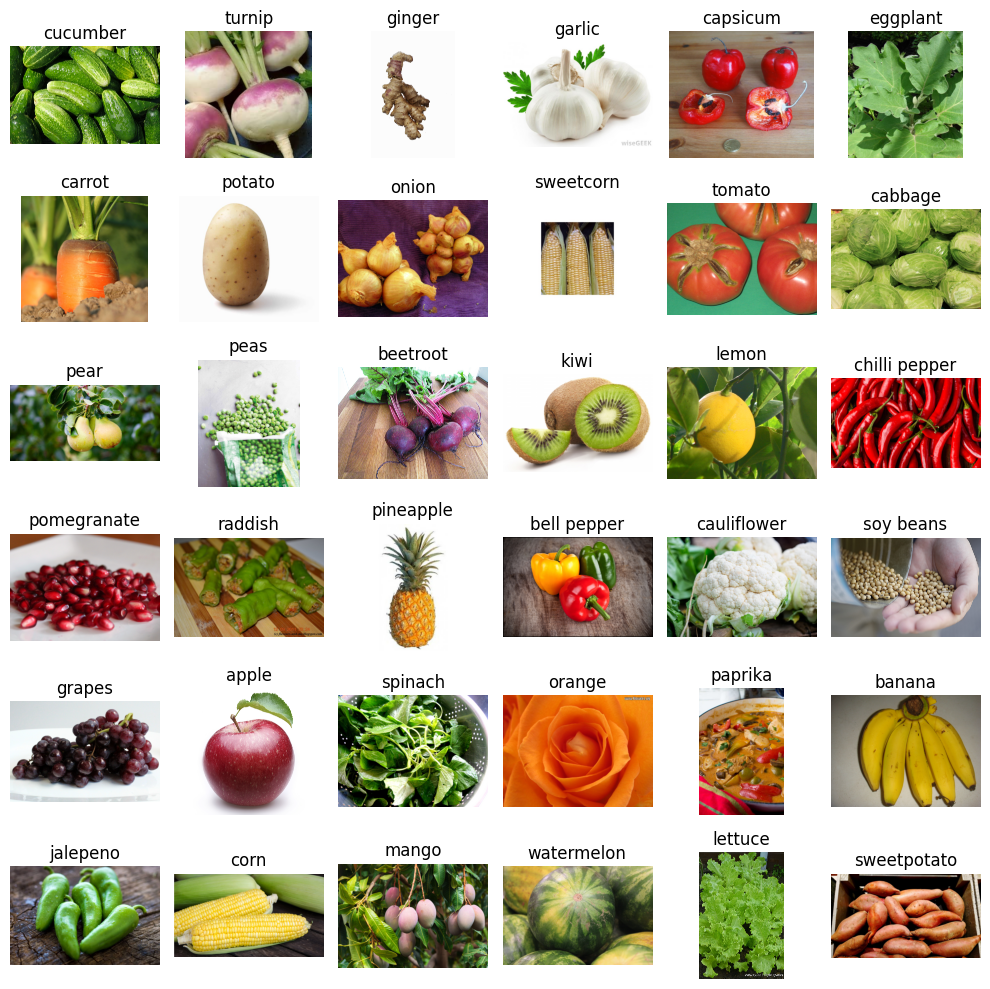

In [ ]:
num_filas = 6
num_cols = (len(clases) + num_filas -1) // num_filas
fig, axes = plt.subplots(num_filas,num_cols,figsize=(10,10))
for i, class_name in enumerate(clases):
  row = i // num_cols
  col = i % num_cols
  class_dir = os.path.join(datos,class_name)
  image_files = os.listdir(class_dir)
  random_image = random.choice(image_files)
  image_path = os.path.join(class_dir,random_image)
  image = cv2.imread(image_path)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  axes[row,col].imshow(image)
  axes[row,col].set_title(class_name)
  axes[row,col].axis('off')

for i in range(len(clases),num_filas*num_cols):
  row = i // num_cols
  col = i % num_cols
  fig.delaxes(axes[row,col])

plt.tight_layout()
plt.show()

##**2. Modelacion del problema y arquitecturas**

**2.1 CNN**

La siguiente es una arquitectura que esta compuesta por capas de convolucion, capas de MaxPool, capas de Dropout para evitar el sobreajuste de algunas muestras en el conjunto de datos que hacen que no se pueda generalizar correctamente, una capa Flatten y varias capas densas, incluyendo la capa de salida (fully connected layer).

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dropout, MaxPool2D, Dense, Flatten

In [ ]:
modelo = Sequential()
modelo.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[64,64,3]))
modelo.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
modelo.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
modelo.add(tf.keras.layers.Dropout(0.25))
modelo.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
modelo.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
modelo.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
modelo.add(tf.keras.layers.Dropout(0.25))
modelo.add(tf.keras.layers.Flatten())
modelo.add(tf.keras.layers.Dense(units=512,activation='relu'))
modelo.add(tf.keras.layers.Dense(units=256,activation='relu'))
modelo.add(tf.keras.layers.Dropout(0.5)) 
modelo.add(tf.keras.layers.Dense(units=36,activation='softmax'))
modelo.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 62, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 31, 31, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 31, 31, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 29, 29, 64)        36928     
                                                        

In [ ]:
entrenamiento = modelo.fit(x=train,validation_data=validation,epochs=15)

Epoch 1/15
98/98 [==============================] - 84s 809ms/step - loss: 11.5342 - accuracy: 0.0302 - val_loss: 3.5834 - val_accuracy: 0.0285
Epoch 2/15
98/98 [==============================] - 83s 813ms/step - loss: 3.5840 - accuracy: 0.0292 - val_loss: 3.5826 - val_accuracy: 0.0313
Epoch 3/15
98/98 [==============================] - 83s 817ms/step - loss: 3.5765 - accuracy: 0.0340 - val_loss: 3.5523 - val_accuracy: 0.0399
Epoch 4/15
98/98 [==============================] - 87s 854ms/step - loss: 3.5631 - accuracy: 0.0369 - val_loss: 3.5622 - val_accuracy: 0.0370
Epoch 5/15
98/98 [==============================] - 86s 834ms/step - loss: 3.5540 - accuracy: 0.0366 - val_loss: 3.5500 - val_accuracy: 0.0456
Epoch 6/15
98/98 [==============================] - 96s 938ms/step - loss: 3.5330 - accuracy: 0.0453 - val_loss: 3.5704 - val_accuracy: 0.0598
Epoch 7/15
98/98 [==============================] - 94s 911ms/step - loss: 3.5244 - accuracy: 0.0469 - val_loss: 3.5482 - val_accuracy: 0.054

Para evaluar el modelo anterior se utiliza la métrica accuracy, la cual determina la precisión con la que el modelo modela los datos. A continuación se muestra una gráfica de esta metrica para la clasificación y detección de las frutas y verduras.

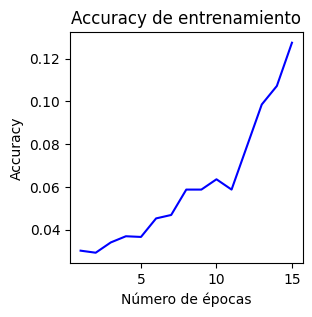

In [ ]:
epocas = [i for i in range(1,16)]
plt.figure(figsize=(3,3))
plt.plot(epocas,entrenamiento.history['accuracy'],color='blue')
plt.xlabel('Número de épocas')
plt.ylabel('Accuracy')
plt.title('Accuracy de entrenamiento')
plt.show()

La grafica anterior muestra que a medida que se adicionan más épocas, la métrica de accuracy se va acercando más a 1, lo que puede ser bueno para este problema, es decir el numero de épocas y la medida de accuracy de entrenamiento son directamente proporcionales.

El accuracy de validación también es útil conocerlo para probar qué tan bueno es el modelo para generalizar en nuevas muestras o qué tan buena es la capacidad para generalizar de este. A continuacion se muestra el diagrama.

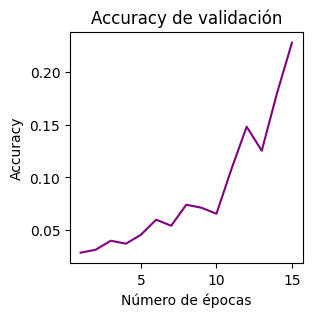

In [ ]:
epocas = [i for i in range(1,16)]
plt.figure(figsize=(3,3))
plt.plot(epocas,entrenamiento.history['val_accuracy'],color='purple')
plt.xlabel('Número de épocas')
plt.ylabel('Accuracy')
plt.title('Accuracy de validación')
plt.show()

En la gráfica de validación también se puede observar que se sigue el mismo patrón de la proporcionalidad directa de las épocas y el accuracy de validación. Ambos diagramas evidencian que el modelo entrenado anteriormente puede generar buenos resultados.

**2.2 Uso de Transfer Learning**

Entrenando el modelo anterior de Deep Learning se evidenció que el tiempo de ejecución que se necesita para que termine las 15 épocas que se establecieron para dicho modelo es un tiempo elevado de alrededor de 30 minutos, tiempo que puede ser disminuido haciendo uso de otras técnicas y entre ellas la de Transfer Learning. 

Los modelos de Transfer Learning que se utilizarán y no se entrenarán serán: 


*   ResNet50V2
*   VGG16
*   DenseNet121

In [ ]:
from tensorflow.keras.applications import ResNet50V2, VGG16, DenseNet121

**2.2.1 ResNet50V2**

In [ ]:
model = tf.keras.applications.ResNet50V2(
    include_top=False,
    weights='imagenet',
    input_shape=(64,64,3),
    pooling='avg'
)
model.trainable = False

94668760/94668760 [==============================] - 1s 0us/step


In [ ]:
inputs = model.input
X = tf.keras.layers.Dense(52, activation='relu')(model.output)
X = tf.keras.layers.Dense(104, activation='relu')(X)
outputs = tf.keras.layers.Dense(36, activation='softmax')(X)
modelo = tf.keras.Model(inputs=inputs, outputs=outputs)
modelo.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
historia = modelo.fit(
    train,
    validation_data=validation,
    batch_size=32,
    epochs=10
) 

Epoch 1/10
98/98 [==============================] - 80s 733ms/step - loss: 15.8587 - accuracy: 0.0270 - val_loss: 3.5827 - val_accuracy: 0.0285
Epoch 2/10
98/98 [==============================] - 75s 727ms/step - loss: 3.5831 - accuracy: 0.0292 - val_loss: 3.5827 - val_accuracy: 0.0256
Epoch 3/10
98/98 [==============================] - 74s 717ms/step - loss: 3.5812 - accuracy: 0.0257 - val_loss: 3.5827 - val_accuracy: 0.0256
Epoch 4/10
98/98 [==============================] - 75s 727ms/step - loss: 3.5803 - accuracy: 0.0289 - val_loss: 3.5820 - val_accuracy: 0.0256
Epoch 5/10
98/98 [==============================] - 72s 689ms/step - loss: 3.5797 - accuracy: 0.0308 - val_loss: 3.5832 - val_accuracy: 0.0256
Epoch 6/10
98/98 [==============================] - 73s 709ms/step - loss: 3.5792 - accuracy: 0.0305 - val_loss: 3.5839 - val_accuracy: 0.0256
Epoch 7/10
98/98 [==============================] - 75s 725ms/step - loss: 3.5799 - accuracy: 0.0321 - val_loss: 3.5849 - val_accuracy: 0.025

A continuación se presenta la gráfica que dibuja las curvas de accuracy de entrenamiento y validación para el modelo anterior.

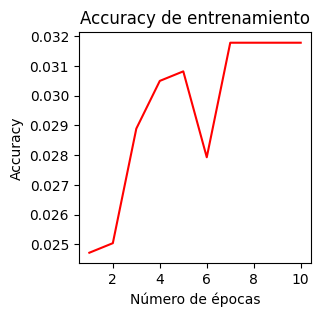

In [ ]:
epocas = [i for i in range(1,11)]
plt.figure(figsize=(3,3))
plt.plot(epocas,historia.history['accuracy'],color='red')
plt.xlabel('Número de épocas')
plt.ylabel('Accuracy')
plt.title('Accuracy de entrenamiento')
plt.show()

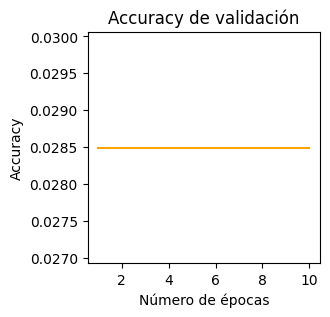

In [ ]:
epocas = [i for i in range(1,11)]
plt.figure(figsize=(3,3))
plt.plot(epocas,historia.history['val_accuracy'],color='orange')
plt.xlabel('Número de épocas')
plt.ylabel('Accuracy')
plt.title('Accuracy de validación')
plt.show()

En los dos diagramas anteriores se puede ver que el accuracy de entrenamiento tiende a mantenerse estable en un sólo valor (32%), y el accuracy de validación es una constante durante todo el entrenamiento (29%), esto permite concluir que este modelo de Transfer Learning no logra conseguir los objetivos de un accuracy cercano al 80% y se necesita de una arquitectura más compleja para resolverlo o un cambio en los parametros para que brinde mejores resultados.

**2.2.2 VGG16**

In [ ]:
model = tf.keras.applications.VGG16(
    include_top=False,
    weights='imagenet',
    input_shape=(64,64,3),
    pooling='avg'
)
model.trainable = False

58889256/58889256 [==============================] - 2s 0us/step


In [ ]:
inputs = model.input
X = tf.keras.layers.Dense(128, activation='relu')(model.output)
X = tf.keras.layers.Dense(256, activation='relu')(X)
outputs = tf.keras.layers.Dense(36, activation='softmax')(X)
modelo = tf.keras.Model(inputs=inputs, outputs=outputs)
modelo.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
historia = modelo.fit(
    train,
    validation_data=validation,
    batch_size=32,
    epochs=10
) 

Epoch 1/10
98/98 [==============================] - 77s 618ms/step - loss: 5.5535 - accuracy: 0.1535 - val_loss: 1.8656 - val_accuracy: 0.5271
Epoch 2/10
98/98 [==============================] - 64s 597ms/step - loss: 2.0788 - accuracy: 0.4392 - val_loss: 1.0049 - val_accuracy: 0.7493
Epoch 3/10
98/98 [==============================] - 64s 591ms/step - loss: 1.2853 - accuracy: 0.6462 - val_loss: 0.6823 - val_accuracy: 0.8604
Epoch 4/10
98/98 [==============================] - 64s 591ms/step - loss: 0.8189 - accuracy: 0.7900 - val_loss: 0.5221 - val_accuracy: 0.9174
Epoch 5/10
98/98 [==============================] - 64s 604ms/step - loss: 0.5285 - accuracy: 0.8665 - val_loss: 0.4325 - val_accuracy: 0.9430
Epoch 6/10
98/98 [==============================] - 64s 604ms/step - loss: 0.3377 - accuracy: 0.9242 - val_loss: 0.3989 - val_accuracy: 0.9430
Epoch 7/10
98/98 [==============================] - 64s 604ms/step - loss: 0.2425 - accuracy: 0.9541 - val_loss: 0.3751 - val_accuracy: 0.9487

Luego de entrenar este modelo, se muestra la gráfica de accuracy de entrenamiento y de validación.

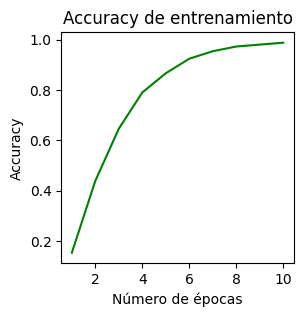

In [ ]:
epocas = [i for i in range(1,11)]
plt.figure(figsize=(3,3))
plt.plot(epocas,historia.history['accuracy'],color='green')
plt.xlabel('Número de épocas')
plt.ylabel('Accuracy')
plt.title('Accuracy de entrenamiento')
plt.show()

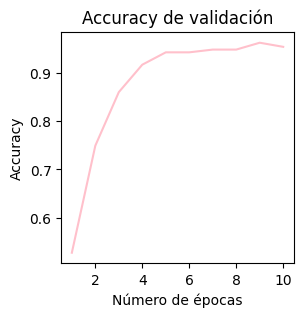

In [ ]:
epocas = [i for i in range(1,11)]
plt.figure(figsize=(3,3))
plt.plot(epocas,historia.history['val_accuracy'],color='pink')
plt.xlabel('Número de épocas')
plt.ylabel('Accuracy')
plt.title('Accuracy de validación')
plt.show()

Los anterior diagramas muestran que el entrenamiento del modelo VGG16 tiende a brindar buenos resultados si se aumenta el número de épocas y también el accuracy de entrenamiento y validación muestra un comportamiento directamente proporcional a las épocas. Las dos gráficas son similares.

**2.2.3 DenseNet121**

In [ ]:
model = tf.keras.applications.DenseNet121(
    include_top=False,
    weights='imagenet',
    input_shape=(64,64,3),
    pooling='avg'
)
model.trainable = False

29084464/29084464 [==============================] - 1s 0us/step


In [ ]:
inputs = model.input
X = tf.keras.layers.Dense(250, activation='relu')(model.output)
X = tf.keras.layers.Dense(285, activation='relu')(X)
outputs = tf.keras.layers.Dense(36, activation='softmax')(X)
modelo = tf.keras.Model(inputs=inputs, outputs=outputs)
modelo.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
historia = modelo.fit(
    train,
    validation_data=validation,
    batch_size=32,
    epochs=10
) 

Epoch 1/10
98/98 [==============================] - 82s 692ms/step - loss: 5.4622 - accuracy: 0.1753 - val_loss: 2.0413 - val_accuracy: 0.4387
Epoch 2/10
98/98 [==============================] - 65s 617ms/step - loss: 2.3663 - accuracy: 0.3409 - val_loss: 1.5493 - val_accuracy: 0.5641
Epoch 3/10
98/98 [==============================] - 66s 629ms/step - loss: 1.8877 - accuracy: 0.4539 - val_loss: 1.0847 - val_accuracy: 0.7151
Epoch 4/10
98/98 [==============================] - 65s 603ms/step - loss: 1.6182 - accuracy: 0.5236 - val_loss: 1.1046 - val_accuracy: 0.7009
Epoch 5/10
98/98 [==============================] - 65s 608ms/step - loss: 1.3884 - accuracy: 0.5852 - val_loss: 1.0215 - val_accuracy: 0.7379
Epoch 6/10
98/98 [==============================] - 65s 605ms/step - loss: 1.2183 - accuracy: 0.6315 - val_loss: 0.9000 - val_accuracy: 0.7692
Epoch 7/10
98/98 [==============================] - 65s 612ms/step - loss: 1.0384 - accuracy: 0.6713 - val_loss: 0.8542 - val_accuracy: 0.7664

Las gráficas de la medida de desempeño se muestras como sigue:

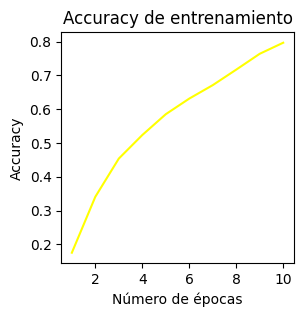

In [ ]:
epocas = [i for i in range(1,11)]
plt.figure(figsize=(3,3))
plt.plot(epocas,historia.history['accuracy'],color='yellow')
plt.xlabel('Número de épocas')
plt.ylabel('Accuracy')
plt.title('Accuracy de entrenamiento')
plt.show()

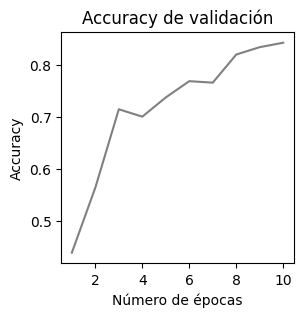

In [ ]:
epocas = [i for i in range(1,11)]
plt.figure(figsize=(3,3))
plt.plot(epocas,historia.history['val_accuracy'],color='gray')
plt.xlabel('Número de épocas')
plt.ylabel('Accuracy')
plt.title('Accuracy de validación')
plt.show()

Las anteriores gráficas muestran un buen comportamiento del acurracy respecto al número de épocas, a medida que aumenta las épocas también lo hace el accuracy de entrenamiento y validación.